# Which variables are good at predicting whether or not someone has heart disease?

## Introduction
- Provide some relevant background information on the topic so that someone unfamiliar with it will be prepared to understand the rest of your proposal
- Clearly state the question you will try to answer with your project
- Identify and describe the dataset that will be used to answer the question


Heart disease is a common disease amongst many people, especially seniors. Specifically, coronary artery disease will be the focus of this data exploration. Coronary artery disease can cause blockages to blood flow to the heart and weaken heart muscles. It is often not detected until someone faces severe symptoms such as a heart attack. Being able to identify if a senior has heart disease is critical so that they can proceed to the treatment they need. However, it is difficult to determine if a senior has heart disease without variables that are good at determing a diagnosis. In this data exploration, different variables will be tested to see their ability at predicting if someone has heart disease. The main question to be answered is, which variables are good at predicting whether or not someone has heart disease? By answering this question, the variables good at predicting can be reported and considered when determining a diagnosis. The variables not good at predicting can be neglected. The heart disease dataset from UCI will be used in this data exploration, focusing specifically on data from Switzerland and Hungary.

## Preliminary exploratory data analysis
- Demonstrate that the dataset can be read from the web into R 
- Clean and wrangle your data into a tidy format
- Using only training data, summarize the data in at least one table (this is exploratory data analysis). An example of a useful table could be one that reports the number of observations in each class, the means of the predictor variables you plan to use in your analysis and how many rows have missing data. 
- Using only training data, visualize the data with at least one plot relevant to the analysis you plan to do (this is exploratory data analysis). An example of a useful visualization could be one that compares the distributions of each of the predictor variables you plan to use in your analysis.

In [2]:
#PRELIMINARY EXPLORATORY DATA ANALYSIS CODE HERE

In [3]:
# necessary library
library(tidyverse)
library(readr)
library(dplyr)
library(stringr)
library(tidymodels)


── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.3     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ ggplot2   3.4.4     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.0
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
── Attaching packages ────────────────────────────────────── tidymodels 1.1.1 ──

✔ broom        1.0.5     ✔ rsample      1.2.0
✔ dials        1.2.0     ✔ tune         1.1.2
✔ infer        1.0.5     ✔ workflows    1.1.3
✔ modeldata    1.2.0     ✔ workflowsets 1.0.1
✔ parsnip      1.1.1     ✔ yardstick    1.2.0
✔ recipes      1.0.8     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filt

In [4]:
# read data
url <- "https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/cleve.mod"
file_path <- "cleve.mod"
download.file(url, destfile = file_path)
heart_data <- read_table(file_path, skip = 20, col_names = c("age", "sex", "cp", "trestbps", "chol", "fbs", "restecg", 
                                                                    "thalach", "exang", "oldpeak", "slope", "ca", "thal", 
                                                                    "disease"), na = "?")

heart_data$disease <- str_replace_all(string = heart_data$disease, pattern = "buff", replacement = "healthy")
head(heart_data)


── Column specification ────────────────────────────────────────────────────────
cols(
  age = col_double(),
  sex = col_character(),
  cp = col_character(),
  trestbps = col_double(),
  chol = col_double(),
  fbs = col_character(),
  restecg = col_character(),
  thalach = col_double(),
  exang = col_character(),
  oldpeak = col_double(),
  slope = col_character(),
  ca = col_double(),
  thal = col_character(),
  disease = col_character()
)

Warning message:
“303 parsing failures.
row col   expected     actual        file
  1  -- 14 columns 15 columns 'cleve.mod'
  2  -- 14 columns 15 columns 'cleve.mod'
  3  -- 14 columns 15 columns 'cleve.mod'
  4  -- 14 columns 15 columns 'cleve.mod'
  5  -- 14 columns 15 columns 'cleve.mod'
... ... .......... .......... ...........
See problems(...) for more details.
”


age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,disease
<dbl>,<chr>,<chr>,<dbl>,<dbl>,<chr>,<chr>,<dbl>,<chr>,<dbl>,<chr>,<dbl>,<chr>,<chr>
63,male,angina,145,233,true,hyp,150,fal,2.3,down,0,fix,healthy
67,male,asympt,160,286,fal,hyp,108,true,1.5,flat,3,norm,sick
67,male,asympt,120,229,fal,hyp,129,true,2.6,flat,2,rev,sick
37,male,notang,130,250,fal,norm,187,fal,3.5,down,0,norm,healthy
41,fem,abnang,130,204,fal,hyp,172,fal,1.4,up,0,norm,healthy
56,male,abnang,120,236,fal,norm,178,fal,0.8,up,0,norm,healthy


In [5]:
set.seed(8888)
# split data into training and testing data
heart_split <- initial_split(heart_data, prop = 0.75, strata = disease)
heart_train <- training(heart_split)
heart_test <- testing(heart_split)

In [6]:
#locate missing data (training data)
train_missing_column <- colSums(is.na(heart_train))
locate_missing_train <- which(!complete.cases(heart_train))
sum_missing_train <- sum(is.na(heart_train))


cat("\033[1mNumber of Missing Data in Each Column: \n")
train_missing_column
cat("\033[1mLocation of Rows That Have Missing Data: \033[0m", locate_missing_train, "\n")
cat("\033[1mNumber of Rows That have Missing Data: \033[0m", sum_missing_train)

Number of Missing Data in Each Column: 


age      sex       cp trestbps     chol      fbs  restecg  thalach 
       0        0        0        0        0        0        0        0 
   exang  oldpeak    slope       ca     thal  disease 
       0        0        0        3        2        0

Location of Rows That Have Missing Data:  34 56 101 181 192 
Number of Rows That have Missing Data:  5

In [7]:
# Frequency of Each Class
cat("\033[1mFrequency of Each Group of People: \n")
table(heart_data$disease)

#Proportion of Each Class
cat("\033[1mProportion of Each Group of People: \n")
prop.table(table(heart_data$disease))

Frequency of Each Group of People: 



healthy    sick 
    165     138 

Proportion of Each Group of People: 



  healthy      sick 
0.5445545 0.4554455 

 For the plot below: The box-plot medians are far apart. Therefore, the maximum heart rate achieved 
is likely statistically significant in determining heart disease. 

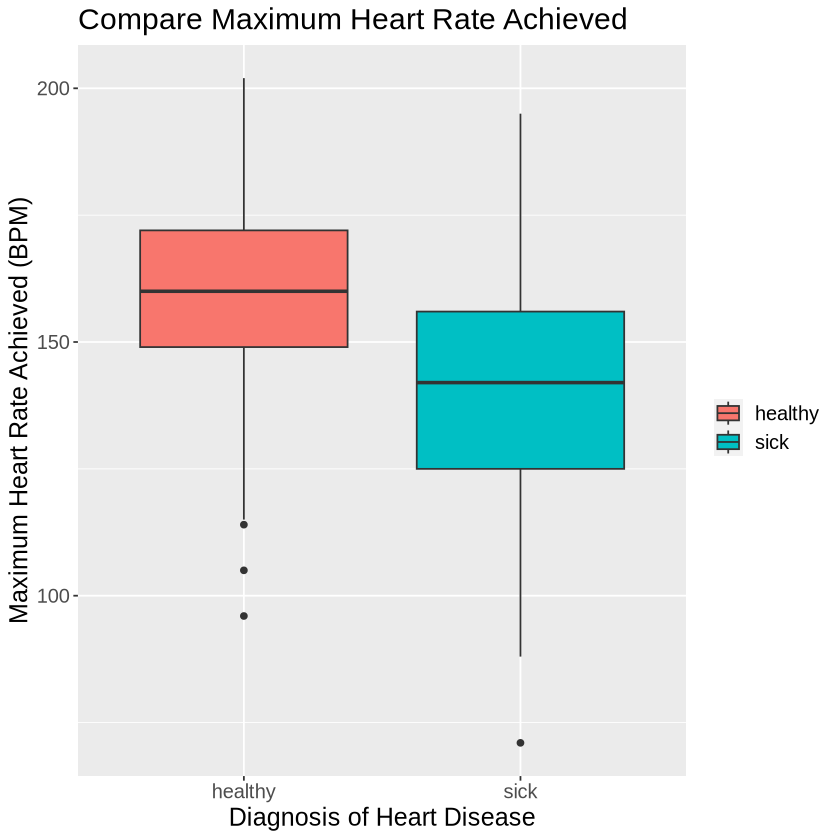

For the plot below: The box-plots medians nearly overlap. Therefore, serum cholestoral level 
is likely not statistically significant in determining heart disease.

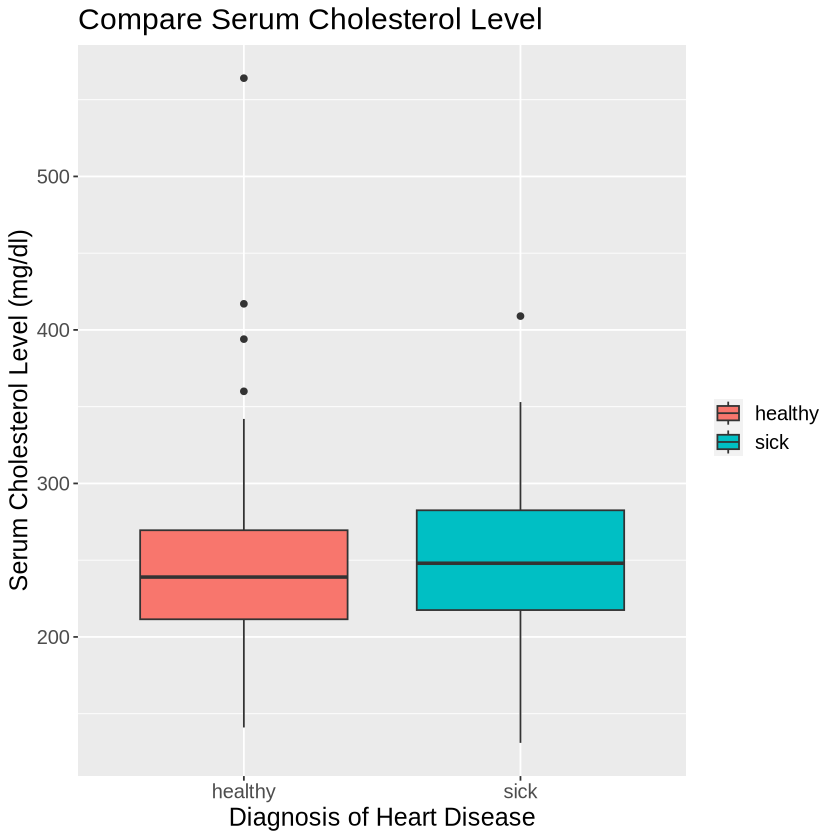

For the plot below: The box-plots medians are far apart. Therefore, depression induced by exercise relative to rest 
is likely statistically significant in determining heart disease.

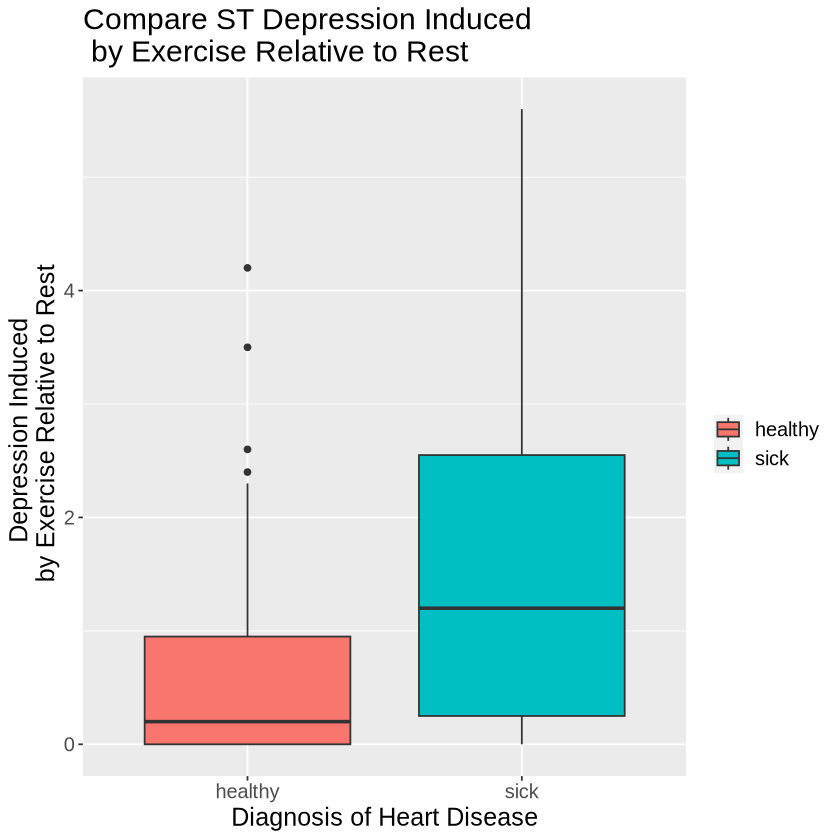

For the plot below: The box-plots medians almost perfectly overlap. Therefore, resting blood pressure 
is not statistically significant in determining heart disease.

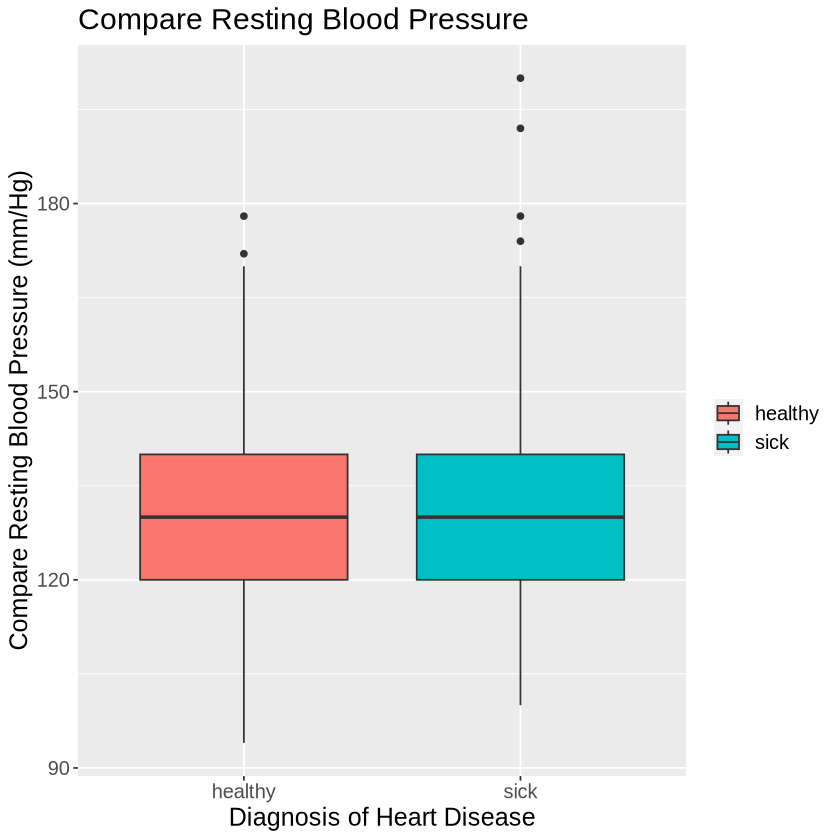

In [8]:
# Visualization (boxplots)
#compare Compare Maximum Heart Rate Achieved between sick or not
thalach_boxplot <- heart_train |>
  ggplot(aes(x = disease, y = thalach, group = disease)) +
  geom_boxplot(aes(fill = disease)) +
  labs(title = "Compare Maximum Heart Rate Achieved",
       x = "Diagnosis of Heart Disease", 
       y = "Maximum Heart Rate Achieved (BPM)",
       fill = " ") +
       theme(text = element_text(size = 15)) 
thalach_boxplot

cat("\033[1m For the plot below: The box-plot medians are far apart. Therefore, the maximum heart rate achieved \nis likely statistically significant in determining heart disease. ")



#compare serum cholestoral level between sick or not
chol_boxplot <- heart_train |>
  ggplot(aes(x = disease, y = chol, group = disease)) +
  geom_boxplot(aes(fill = disease)) +
  labs(title = "Compare Serum Cholesterol Level",
       x = "Diagnosis of Heart Disease",
       y = "Serum Cholesterol Level (mg/dl)",
       fill = " ") +
       theme(text = element_text(size = 15))
chol_boxplot

cat("\033[1mFor the plot below: The box-plots medians nearly overlap. Therefore, serum cholestoral level \nis likely not statistically significant in determining heart disease.")

#compare ST depression induced by exercise relative to rest between sick or not
oldpeak_boxplot <- heart_train |>
  ggplot(aes(x = disease, y = oldpeak, group = disease)) +
  geom_boxplot(aes(fill = disease)) +
  labs(title = "Compare ST Depression Induced \n by Exercise Relative to Rest",
       x = "Diagnosis of Heart Disease",
       y = "Depression Induced \n by Exercise Relative to Rest",
       fill = " ") +
       theme(text = element_text(size = 15))
oldpeak_boxplot

cat("\033[1mFor the plot below: The box-plots medians are far apart. Therefore, depression induced by exercise relative to rest \nis likely statistically significant in determining heart disease.")

#compare Resting Blood Pressure between sick or not
trestbps_boxplot <- heart_train |> 
  ggplot(aes(x = disease, y = trestbps, group = disease)) +
  geom_boxplot(aes(fill = disease)) +
  labs(title = "Compare Resting Blood Pressure",
       x = "Diagnosis of Heart Disease",
       y = "Compare Resting Blood Pressure (mm/Hg)",
       fill = " ") +
       theme(text = element_text(size = 15))
trestbps_boxplot

cat("\033[1mFor the plot below: The box-plots medians almost perfectly overlap. Therefore, resting blood pressure \nis not statistically significant in determining heart disease.")


For the plot below: The proportion of people who have exercise-induced angina 
is generally higher in groups of people with heart disease.

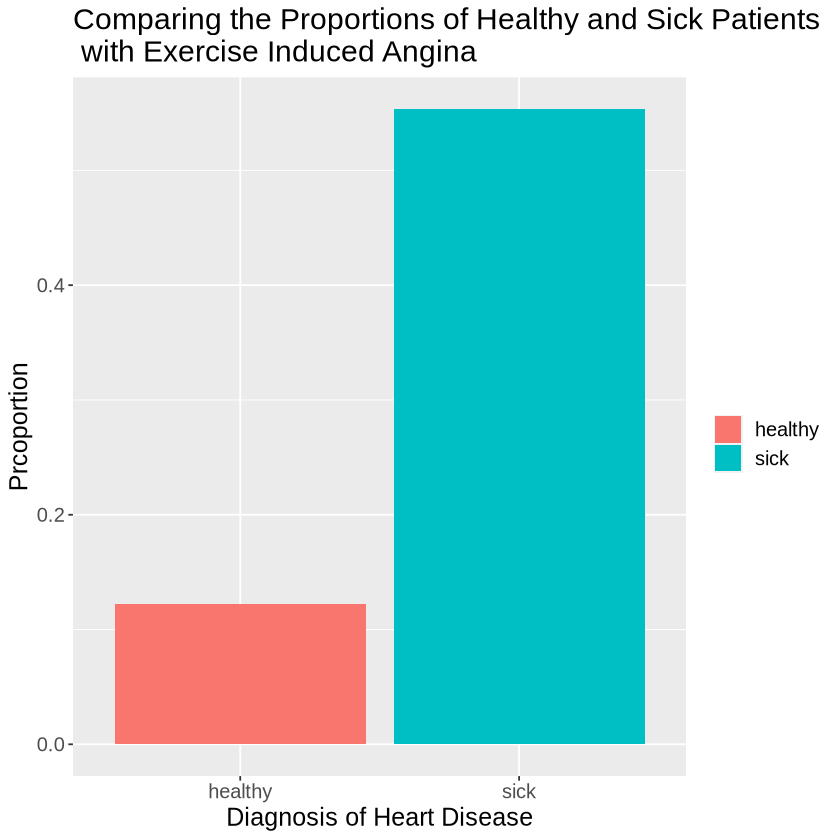

For the plot below: The proportion of people who have fasting blood sugar over 120 mg/dl 
is approximately the same in both groups.

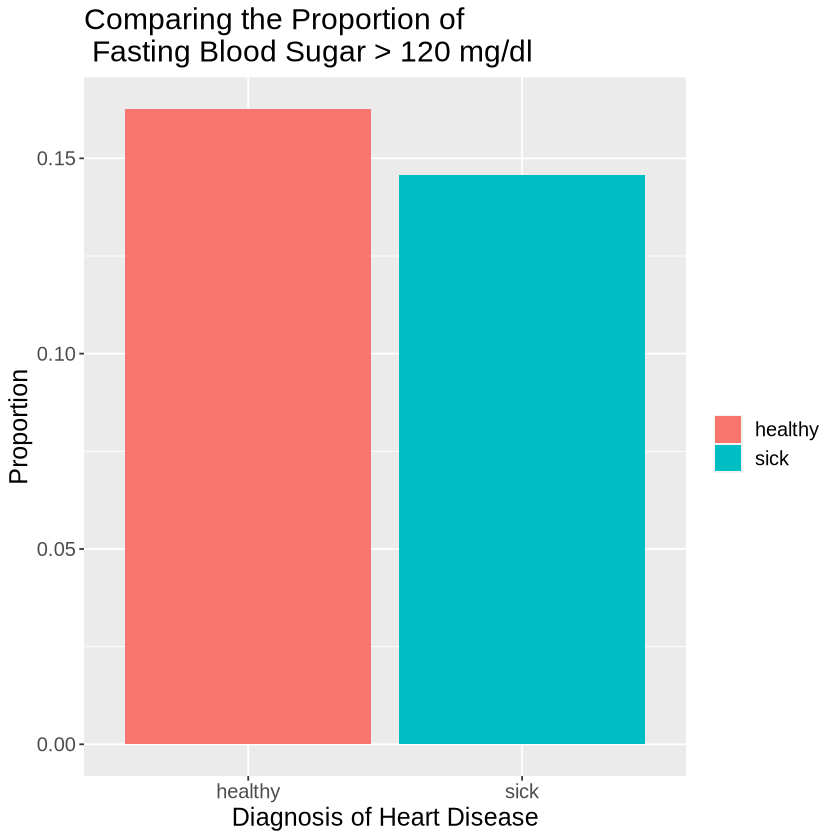

In [9]:
# Visualization (boxplots)
prop_heart <- heart_train|>
    group_by(disease) |>
    summarize(prop_exang = mean(exang == "true"), prop_fbs = mean(fbs == "true"))

exang_bar <- prop_heart |>
  ggplot(aes(x = disease, y = prop_exang, fill = disease)) +
  geom_bar(stat = "identity") +
  labs(title = "Comparing the Proportions of Healthy and Sick Patients \n with Exercise Induced Angina",
       x = "Diagnosis of Heart Disease", 
       y = "Prcoportion",
       fill = " ") +
       theme(text = element_text(size = 15))
exang_bar

cat("\033[1mFor the plot below: The proportion of people who have exercise-induced angina \nis generally higher in groups of people with heart disease.")

fbs_bar <- prop_heart |>
  ggplot(aes(x = disease, y = prop_fbs, fill = disease)) +
  geom_bar(stat = "identity") +
  labs(title = "Comparing the Proportion of \n Fasting Blood Sugar > 120 mg/dl",
       x = "Diagnosis of Heart Disease", 
       y = "Proportion",
       fill = " ") +
       theme(text = element_text(size = 15))
fbs_bar

cat("\033[1mFor the plot below: The proportion of people who have fasting blood sugar over 120 mg/dl \nis approximately the same in both groups.")


## Methods
- Explain how you will conduct either your data analysis and which variables/columns you will use. Note - you do not need to use all variables/columns that exist in the raw data set. In fact, that's often not a good idea. For each variable think: is this a useful variable for prediction?
- Describe at least one way that you will visualize the results

Comparison of medians of box plots and proportionalities in bar graphs will be the primary methods to answer the question of this analysis. Specifically, box plots with similar medians between healthy (no heart disease) and sick (having heart disease) show that a variable is ineffective at predicting (no differences between two classes) and that is the same case for bar graphs with similar proportions. All visualizations will be plotted against diagnosis of heart disease as that is critical in determining if variables are productive at predicting the classes or not. The variables to be used in this analysis are maximum heart rate achieved, serum cholesterol level, depression induced by exercise relative to rest, resting blood sugar, exercise induced angina, and fasting blood sugar. The first three visualizations will involve numerical variables. The first is serum cholesterol levels and the plot suggests serum cholesterol levels are not statistically significant in determining heart health due to similar medians between the healthy and sick. For the following box plots, the same technique was used in determining if variables were statistically relevant. Afterwards, bar plots were used for categorical variables and proportionality was used as the main indicator. First, there is the development of angina during and after exercise, which is potentially the most dangerous variable affecting one's health due to the high difference in proportions. The next variable used the same comparison method and was determined to not be statistically relevant.


## Expected outcomes and significance
- What do you expect to find?
- What impact could such findings have?
- What future questions could this lead to?

We expect to determine which variables are effective for predicting a heart disease diagnosis. These findings could help healthcare practioners determine the risk of patients depending on other measures about their health. Analyses like this could aid investigation into the root cause and biological mechanisms of heart disease once correlations are drawn, and the overall advancement of medicine.
For example, future questions could include: "What are the biological mechanisms that cause these correlations with heart disease?" 

## Bibliography

Centers for Disease Control and Prevention. (2021a, July 19). Coronary artery disease. Centers for Disease Control and Prevention. https://www.cdc.gov/heartdisease/coronary_ad.htm#:~:text=Print-,Coronary%20Artery%20Disease,This%20process%20is%20called%20atherosclerosis 

Heart disease. UCI Machine Learning Repository. (n.d.-a). https://archive.ics.uci.edu/dataset/45/heart+disease 